In [1]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from imgaug.augmentables.kps import KeypointsOnImage
from imgaug.augmentables.kps import Keypoint
import imgaug.augmenters as iaa

from PIL import Image
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import os


C:\Users\BK\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\BK\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\BK\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\BK\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import GlobalAveragePooling2D

In [4]:
data=## TEST IMAGE PATH
data = json.load(open(data))
path_name=## PATH NAME

df = pd.DataFrame(data["shapes"])
# data['shapes']

In [3]:
IMG_DIR = "Images"
JSON = "StanfordExtra_V12/StanfordExtra_v12.json"
KEYPOINT_DEF = (
    "https://github.com/benjiebob/StanfordExtra/raw/master/keypoint_definitions.csv"
)

# Load the ground-truth annotations.
with open(JSON) as infile:
    json_data = json.load(infile)

# Set up a dictionary, mapping all the ground-truth information
# with respect to the path of the image.
json_dict = {i["img_path"]: i for i in json_data}


FileNotFoundError: [Errno 2] No such file or directory: 'StanfordExtra_V12/StanfordExtra_v12.json'

In [87]:
keypoint_def=df.copy()
keypoint_def
data['imagePath']

data['imageHeight']
data['imageWidth']
data
keypoint_def['points'].tolist()

[[[183.09815950920247, 583.4355828220858]],
 [[301.50306748466255, 581.5950920245398]],
 [[645.6748466257668, 576.9938650306748]],
 [[989.2331288343557, 576.9938650306748]],
 [[1107.9447852760736, 577.6073619631901]],
 [[339.5398773006135, 466.5644171779141]],
 [[642.6073619631902, 463.80368098159505]],
 [[946.9018404907976, 463.19018404907973]],
 [[280.9509202453988, 363.80368098159505]],
 [[371.7484662576687, 363.4969325153374]],
 [[640.7668711656441, 361.6564417177914]],
 [[909.4785276073619, 359.5092024539877]],
 [[1001.1963190184049, 359.5092024539877]],
 [[397.54716981132077, 281.50943396226415]],
 [[638.4905660377359, 280.5660377358491]],
 [[879.622641509434, 279.0566037735849]],
 [[340.7547169811321, 224.33962264150944]],
 [[415.47169811320754, 224.33962264150944]],
 [[637.3584905660377, 223.77358490566039]],
 [[859.245283018868, 221.8867924528302]],
 [[934.1509433962265, 221.13207547169813]]]

In [3]:
labels = keypoint_def["label"].values.tolist()

# Utility for reading an image and for getting its annotations.
def tennis_court(path):
    img_data = plt.imread(os.path.join(path, data["imagePath"]))
    # If the image is RGBA convert it to RGB.
    if img_data.shape[-1] == 4:
        img_data = img_data.astype(np.uint8)
        img_data = Image.fromarray(img_data)
        img_data = np.array(img_data.convert("RGB"))
    data["img_data"] = img_data

    return data

NameError: name 'keypoint_def' is not defined

In [76]:
tennis_court(path_name)['shapes'][2]['points'][0]
# keypoint_def
tennis_court(path_name)['imagePath']

'image91.jpg'

In [189]:
def visualize_keypoints(image, df):
    im = plt.imread(image)
    implot = plt.imshow(im)
    plt.scatter(x=df['x'],y=df['y'],s=4)

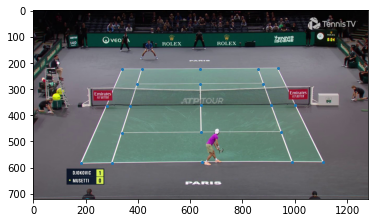

In [190]:
visualize_keypoints(image, df)

In [198]:
df

,label,points,group_id,shape_type,flags,x,y
0,B1,"[[183.09815950920247, 583.4355828220858]]",None,point,{},183.098160,583.435583
1,B2,"[[301.50306748466255, 581.5950920245398]]",None,point,{},301.503067,581.595092
2,B3,"[[645.6748466257668, 576.9938650306748]]",None,point,{},645.674847,576.993865
3,B4,"[[989.2331288343557, 576.9938650306748]]",None,point,{},989.233129,576.993865
4,B5,"[[1107.9447852760736, 577.6073619631901]]",None,point,{},1107.944785,577.607362
5,M1,"[[339.5398773006135, 466.5644171779141]]",None,point,{},339.539877,466.564417
6,M2,"[[642.6073619631902, 463.80368098159505]]",None,point,{},642.607362,463.803681
7,M3,"[[946.9018404907976, 463.19018404907973]]",None,point,{},946.901840,463.190184
8,F1,"[[280.9509202453988, 363.80368098159505]]",None,point,{},280.950920,363.803681
9,F2,"[[371.7484662576687, 363.4969325153374]]",None,point,{},371.748466,363.496933


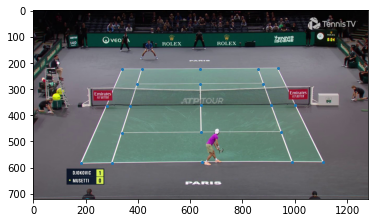

In [188]:
keypoints=keypoint_def['points'].tolist()

im = plt.imread(image)
implot = plt.imshow(im)
plt.scatter(x=df['x'],y=df['y'],s=4)

In [253]:
import itertools
keypoints[0][0][1]

keypoints

keypoints3=list(itertools.chain(*keypoints2))
df
df['x'] = df['points'].map(lambda x: x[0][0])
df['y'] = df['points'].map(lambda x: x[0][1]) 
df['pair']=df['points'].map(lambda x: [x[0][0],x[0][1]])
  
# np.array(data["joints"])[:, :2]    
tennis_court(path_name)['shapes']


[{'label': 'B1',
  'points': [[183.09815950920247, 583.4355828220858]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'B2',
  'points': [[301.50306748466255, 581.5950920245398]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'B3',
  'points': [[645.6748466257668, 576.9938650306748]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'B4',
  'points': [[989.2331288343557, 576.9938650306748]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'B5',
  'points': [[1107.9447852760736, 577.6073619631901]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'M1',
  'points': [[339.5398773006135, 466.5644171779141]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'M2',
  'points': [[642.6073619631902, 463.80368098159505]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'M3',
  'points': [[946.9018404907976, 463.19018404907973]],


- image_keys: file names
- image_keys_temp: Name of files for batch



In [184]:
# class KeyPointsDataset(keras.utils.Sequence):
#     def __init__(self, image_keys, aug, batch_size=BATCH_SIZE, train=True):
#         self.image_keys = image_keys
#         self.aug = aug
#         self.batch_size = batch_size
#         self.train = train
#         self.on_epoch_end()

#     def __len__(self):
#         return len(self.image_keys) // self.batch_size

#     def on_epoch_end(self):
#         self.indexes = np.arange(len(self.image_keys))
#         if self.train:
#             np.random.shuffle(self.indexes)

#     def __getitem__(self, index):
#         indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
#         image_keys_temp = [self.image_keys[k] for k in indexes]
#         (images, keypoints) = self.__data_generation(image_keys_temp)

#         return (images, keypoints)

#     def __data_generation(self, image_keys_temp):
#         batch_images = np.empty((self.batch_size, IMG_SIZE, IMG_SIZE, 3), dtype="int")
#         batch_keypoints = np.empty(
#             (self.batch_size, 1, 1, NUM_KEYPOINTS), dtype="float32"
#         )

#         for i, key in enumerate(image_keys_temp):
#             data = get_dog(key)
#             current_keypoint = np.array(data["joints"])[:, :2]
#             kps = []

#             # To apply our data augmentation pipeline, we first need to
#             # form Keypoint objects with the original coordinates.
#             for j in range(0, len(current_keypoint)):
#                 kps.append(Keypoint(x=current_keypoint[j][0], y=current_keypoint[j][1]))

#             # We then project the original image and its keypoint coordinates.
#             current_image = data["img_data"]
#             kps_obj = KeypointsOnImage(kps, shape=current_image.shape)

#             # Apply the augmentation pipeline.
#             (new_image, new_kps_obj) = self.aug(image=current_image, keypoints=kps_obj)
#             batch_images[i,] = new_image

#             # Parse the coordinates from the new keypoint object.
#             kp_temp = []
#             for keypoint in new_kps_obj:
#                 kp_temp.append(np.nan_to_num(keypoint.x))
#                 kp_temp.append(np.nan_to_num(keypoint.y))

#             # More on why this reshaping later.
#             batch_keypoints[i,] = np.array(kp_temp).reshape(1, 1, 24 * 2)

#         # Scale the coordinates to [0, 1] range.
#         batch_keypoints = batch_keypoints / IMG_SIZE

#         return (batch_images, batch_keypoints)


0      183.098160
1      301.503067
2      645.674847
3      989.233129
4     1107.944785
5      339.539877
6      642.607362
7      946.901840
8      280.950920
9      371.748466
10     640.766871
11     909.478528
12    1001.196319
13     397.547170
14     638.490566
15     879.622642
16     340.754717
17     415.471698
18     637.358491
19     859.245283
20     934.150943
Name: x, dtype: float64

In [5]:
IMG_SIZE = 224
BATCH_SIZE = 2
EPOCHS = 5
NUM_KEYPOINTS = 21 * 2

In [76]:
def tennis_court(name):
#     data = json_dict[name]
    img_data = plt.imread(name)
    # If the image is RGBA convert it to RGB.
    if img_data.shape[-1] == 4:
        img_data = img_data.astype(np.uint8)
        img_data = Image.fromarray(img_data)
        img_data = np.array(img_data.convert("RGB"))
    return img_data


# class train_dataset(keras.utils.Sequence):
class KeyPointsDataset(keras.utils.Sequence):

    def __init__(self, image_keys, aug, batch_size=BATCH_SIZE, train=True):
        self.image_keys = image_keys ##<-------------- LIST OF JSONS/ ALL JSONS IN DIRECTORY
        self.aug = aug
        self.batch_size = batch_size
        self.train = train
        self.on_epoch_end()

    def __len__(self):
        return len(self.image_keys) // self.batch_size

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.image_keys)) ##<-------------------------- NUMBER OF JSON IN DIRECTORY
        if self.train:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size] ##<------------------------ BATCH JSON
        image_keys_temp = [self.image_keys[k] for k in indexes] ##<------------- GET JSON FROM BATCH JSON INDEX
        (images, keypoints) = self.__data_generation(image_keys_temp) ##<------------ INPUT JSON INTO FUNCTION

        return (images, keypoints)

    def __data_generation(self, image_keys_temp):
        labels=['B1','B2','B3','B4','B5','M1','M2','M3','F1','F2','F3','F4','F5','MA1','MA2','MA3','BA1','BA2','BA3','BA4','BA5',]
        
        batch_images = np.empty((self.batch_size, IMG_SIZE, IMG_SIZE, 3), dtype="int")
        batch_keypoints = np.empty(
            (self.batch_size, 1, 1, NUM_KEYPOINTS), dtype="float32"
        )
    

        for i, key in enumerate(image_keys_temp):#<------------------------------------------Name of each JSON IN DIR
        #         print(i,key)
#             labels=['B1','B2','B3','B4','B5','M1','M2','M3','F1','F2','F3','F4','F5','MA1','MA2','MA3','BA1','BA2','BA3','BA4','BA5',]
#             df=df.set_index('label')

#             df = df.reindex(labels,fill_value=0)

            data = json.load(open(key))
            df = pd.DataFrame(data["shapes"])
            df=df.set_index('label')

            df = df.reindex(labels,fill_value=0)
#             df['points']=df['points'].map(lambda x: [x[0][0],x[0][1]])
            df['points']=df['points'].map(lambda x: [x[0][0],x[0][1]] if x!=0 else [0,0,0])

            df['points']=df['points'].apply(lambda x:[x[0],x[1],1] if x!=0 else [0,0,0] )



        #         data = get_dog(key)#<-------------------------------------------TURN JSON TO DATAFRAME WITH APPROPRIATE COLUMNS
            coord=df["points"].tolist()
            current_keypoint = np.array(coord)
            kps = []

                # To apply our data augmentation pipeline, we first need to
                # form Keypoint objects with the original coordinates.
            for j in range(0, len(current_keypoint)):
                kps.append(Keypoint(x=current_keypoint[j][0], y=current_keypoint[j][1]))

    #         # We then project the original image and its keypoint coordinates.
            a=key.split('\\')
            img=os.path.join(('\\'.join(a[:-1])),data['imagePath'])
            current_image = tennis_court(img)#<--------------------------------------------- READ IMAGE PATH WITH IMAGE PROCESSING
            kps_obj = KeypointsOnImage(kps, shape=current_image.shape)

            # Apply the augmentation pipeline.
            (new_image, new_kps_obj) = self.aug(image=current_image, keypoints=kps_obj)
            batch_images[i,] = new_image

            # Parse the coordinates from the new keypoint object.
            kp_temp = []
            for keypoint in new_kps_obj:
                kp_temp.append(np.nan_to_num(keypoint.x))
                kp_temp.append(np.nan_to_num(keypoint.y))

            # More on why this reshaping later.
            batch_keypoints[i,] = np.array(kp_temp).reshape(1, 1, 21 * 2)

        # Scale the coordinates to [0, 1] range.
        batch_keypoints = batch_keypoints / IMG_SIZE    
        return (batch_images, batch_keypoints)

     

In [77]:
train_aug = iaa.Sequential(
    [
        iaa.Resize(IMG_SIZE, interpolation="linear"),
        iaa.Fliplr(0.3),
#         `Sometimes()` applies a function randomly to the inputs with
#         a given probability (0.3, in this case).
#         iaa.Sometimes(0.3, iaa.Affine(rotate=10, scale=(0.5, 0.7)))
    ]
)

test_aug = iaa.Sequential([iaa.Resize(IMG_SIZE, interpolation="linear")])


In [78]:
path=## PATH TO IMAGES
samples=[]
for file in os.listdir(#PATH TO IMAGES):
    if 'json' in file:
        final=os.path.join(path,file)
        samples.append(final)

In [79]:
np.random.shuffle(samples)
train_keys, validation_keys = samples[0:int(len(samples) * 0.85) ],samples[int(len(samples) * 0.85):]


In [125]:
# train_keys
# train_keys=np.array(train_keys)
# validation_keys=np.array(validation_keys)

len(train_keys)

215

In [122]:
train_dataset = KeyPointsDataset(train_keys, train_aug)
validation_dataset = KeyPointsDataset(validation_keys, test_aug, train=False)

# train_dataset

# train_dataset = KeyPointsDataset(train_keys)
# validation_dataset = KeyPointsDataset(validation_keys, train=False)

In [139]:
IMG_SIZE=224
def get_model():
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = keras.applications.MobileNetV2(
        weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    backbone.trainable = False

    inputs = layers.Input((IMG_SIZE, IMG_SIZE, 3))
    x = keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.6)(x)
    x = layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=5, strides=1, activation="relu"
    )(x)
    
    outputs = layers.SeparableConv2D(
        NUM_KEYPOINTS, kernel_size=3, strides=1, activation="sigmoid"
    )(x)

    return keras.Model(inputs, outputs, name="keypoint_detector")


In [118]:
len(validation_dataset)

19

In [497]:
# batch_siz=5
# target_size = (224, 224,3)
# train_keys.astype(int)
# traingen = CustomDataGen(train_keys,
# #                          X_col={'File':'File','X':'X','Y':'Y','Width':'Width','Height':"Height"},
# #                          y_col={'Label_Name':'Label_Name','Label_ID':'Label_ID'},
#                          batch_size=10, input_size=target_size)

AttributeError: 'list' object has no attribute 'astype'

## ACCURACY

### 0.15:
Epoch 15/15
80/80 [==============================] - 23s 283ms/step - loss: 75.2675 - acc: 0.0125 - val_loss: 74.5826 - val_acc: 0.0000e+00


### 0.20:

Epoch 15/15
76/76 [==============================] - 22s 293ms/step - loss: 74.6549 - acc: 0.0329 - val_loss: 75.1770 - val_acc: 0.0000e+00

### 0.40:



### 0.50:

Epoch 1/15
47/47 [==============================] - 29s 610ms/step - loss: 76.3897 - acc: 0.0638 - val_loss: 75.0144 - val_acc: 0.0357
Epoch 2/15

### 0.70:



### 0.85:


In [140]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')




model = get_model()
# model.compile(loss="mse", optimizer=keras.optimizers.Adam(1e-4))

model.compile(
    loss='MSE',
    optimizer=optimizers.Adam(lr=0.0005),
    metrics=['accuracy'])


model.fit(train_dataset, validation_data=validation_dataset, epochs=100)
# model.fit(train_dataset, validation_data=validation_dataset, epochs=EPOCHS)

# model.fit_generator(x=train_dataset,
#             steps_per_epoch=len(train_dataset),
#             validation_data=validation_dataset,
#             validation_steps=len(validation_dataset),
#             epochs=2,
#             verbose=2,
#             callbacks=callbacks)



Epoch 1/100
107/107 [==============================] - 29s 276ms/step - loss: 0.0291 - acc: 0.0047 - val_loss: 0.0153 - val_acc: 0.0526
Epoch 2/100
107/107 [==============================] - 23s 214ms/step - loss: 0.0182 - acc: 0.0093 - val_loss: 0.0113 - val_acc: 0.0263
Epoch 3/100
107/107 [==============================] - 23s 219ms/step - loss: 0.0131 - acc: 0.0234 - val_loss: 0.0189 - val_acc: 0.0263
Epoch 4/100
107/107 [==============================] - 24s 222ms/step - loss: 0.0073 - acc: 0.3645 - val_loss: 0.0188 - val_acc: 0.0000e+00
Epoch 5/100
107/107 [==============================] - 24s 222ms/step - loss: 0.0055 - acc: 0.6636 - val_loss: 0.0216 - val_acc: 0.0000e+00
Epoch 6/100
107/107 [==============================] - 24s 223ms/step - loss: 0.0047 - acc: 0.7570 - val_loss: 0.0177 - val_acc: 0.0000e+00
Epoch 7/100
107/107 [==============================] - 24s 221ms/step - loss: 0.0045 - acc: 0.7804 - val_loss: 0.0166 - val_acc: 0.0000e+00
Epoch 8/100
107/107 [===========

KeyboardInterrupt: 

In [112]:
# model.save('tenniscourt_test')
model.summary()



Model: "keypoint_detector"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_truediv_1 (Tenso [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_sub_1 (TensorFlo [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 1280)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 3, 3, 42)          85802     
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 1, 1, 42)    

107

In [83]:
from PIL import Image
img_path=## IMAGE PATH
img= image.load_img(img_path, target_size=(224, 224,3))
# grayImage = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_batch2=tf.keras.applications.mobilenet.preprocess_input(
    img_batch, data_format=None
)

In [234]:
img_batch2=tf.keras.applications.mobilenet.preprocess_input(
    img_batch, data_format=None
)

In [84]:
# img_batch2
# img= image.load_img(img_path, target_size=(224, 224,3))

predictions = model.predict(img_batch2)
predictions

array([[[[0.3832742 , 0.56930965, 0.4266905 , 0.6043905 , 0.48953658,
          0.6182519 , 0.54315454, 0.62230754, 0.64260435, 0.60729843,
          0.43779933, 0.49057996, 0.474033  , 0.5310328 , 0.56813455,
          0.55225384, 0.3941506 , 0.4491657 , 0.4421642 , 0.4369028 ,
          0.47708994, 0.49688572, 0.5034426 , 0.44370916, 0.6113434 ,
          0.4431766 , 0.44105202, 0.3806126 , 0.48021993, 0.41362402,
          0.555701  , 0.3936866 , 0.46279356, 0.3401211 , 0.48182726,
          0.4023829 , 0.49102035, 0.40302712, 0.5692686 , 0.3594823 ,
          0.5494987 , 0.38693184]]]], dtype=float32)

In [75]:
img=sample_val_images[0]
img=np.expand_dims(img, axis=0)
# img_batch = np.expand_dims(img, axis=0)

img_batch2=tf.keras.applications.mobilenet.preprocess_input(
    img, data_format=None)
predictions = model.predict(img_batch2)


NameError: name 'sample_val_images' is not defined

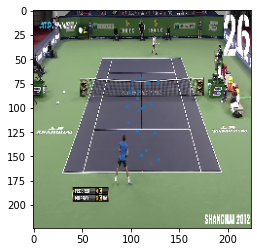

In [142]:
# sample_val_images, sample_val_keypoints = next(iter(validation_dataset))
# sample_val_images = sample_val_images[:4]

img_path=r# PATH TO IMAGES
img= image.load_img(img_path, target_size=(224, 224,3))
# # grayImage = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)

img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_batch2=tf.keras.applications.mobilenet.preprocess_input(
    img_batch, data_format=None
)



# predictions = model.predict(img_batch)




# sample_val_keypoints = img_array.reshape(-1, 21, 2) * IMG_SIZE
predictions = model.predict(img_batch).reshape(-1, 21, 2) * IMG_SIZE
# predictions = (model.predict(img_batch2)* IMG_SIZE).reshape(-1, 21, 2)

# # Ground-truth
# visualize_keypoints(sample_val_images, sample_val_keypoints)

# # Predictions
# visualize_keypoints(sample_val_images, predictions)
predictions[0][0]

pred_df= pd.DataFrame(predictions[0],columns =['x', 'y'])
pred_df
# im = plt.imread(img_batch)
implot = plt.imshow(img)
plt.scatter(x=pred_df['x'],y=pred_df['y'],s=5)

In [134]:
for x in pred_df.values:
    print(x.keypoints)

AttributeError: 'numpy.ndarray' object has no attribute 'keypoints'

In [79]:
predictions2=predictions.reshape(-1, 21, 2) * IMG_SIZE


# sample_val_keypoints = sample_val_keypoints[:4].reshape(-1, 24, 2) * IMG_SIZE
# visualize_keypoints(sample_val_images, predictions2)


In [86]:
def visualize_keypoints(image, df):
    predictions2=predictions.reshape(-1, 21, 2) * IMG_SIZE
    pred_df= pd.DataFrame(predictions2[0],columns =['x', 'y'])
    im = plt.imread(image)
    implot = plt.imshow(im)
    plt.scatter(x=pred_df['x'],y=pred_df['y'],s=5)
  


TypeError: Invalid shape (1, 224, 224, 3) for image data

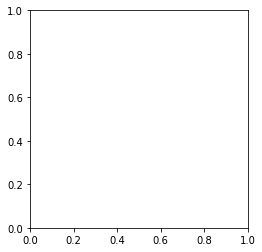

In [244]:
# visualize_keypoints(img_path, predictions)

predictions2=predictions.reshape(-1, 21, 2) * IMG_SIZE
pred_df= pd.DataFrame(predictions2[0],columns =['x', 'y'])
# im = plt.imread(image)
implot = plt.imshow(img_batch)
plt.scatter(x=pred_df['x'],y=pred_df['y'],s=5)
# plt.scatter(x=pred_df['y'],y=pred_df['x'],s=5)

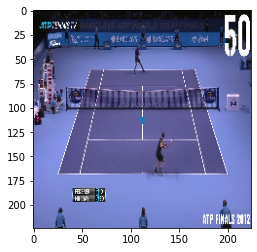

In [246]:
# visualize_keypoints(img_path, predictions)
predictions2=predictions[0][0][0].reshape(-1, 21, 2) * IMG_SIZE
pred_df= pd.DataFrame(predictions2[0],columns =['x', 'y'])
# im = plt.imread(image)
implot = plt.imshow(img)
plt.scatter(x=pred_df['x'],y=pred_df['y'],s=5)
# plt.scatter(x=pred_df['y'],y=pred_df['x'],s=5)

In [137]:

# pred_df= pd.DataFrame(predictions[0][0][0],columns =['x', 'y'])
predictions[0].keypoints


AttributeError: 'numpy.ndarray' object has no attribute 'keypoints'

In [564]:
sample_val_images, sample_val_keypoints = next(iter(validation_dataset))

In [569]:
def visualize_keypoints(images, keypoints):
    fig, axes = plt.subplots(nrows=len(images), ncols=2, figsize=(16, 12))
    [ax.axis("off") for ax in np.ravel(axes)]

    for (ax_orig, ax_all), image, current_keypoint in zip(axes, images, keypoints):
        ax_orig.imshow(image)
        ax_all.imshow(image)

        # If the keypoints were formed by `imgaug` then the coordinates need
        # to be iterated differently.
        if isinstance(current_keypoint, KeypointsOnImage):
            for idx, kp in enumerate(current_keypoint.keypoints):
                ax_all.scatter(
                    [kp.x], [kp.y], c=colours[idx], marker="x", s=50, linewidths=5
                )
        else:
            current_keypoint = np.array(current_keypoint)
            # Since the last entry is the visibility flag, we discard it.
            current_keypoint = current_keypoint[:, :2]
            for idx, (x, y) in enumerate(current_keypoint):
                ax_all.scatter([x], [y], c=colours[idx], marker="x", s=50, linewidths=5)

    plt.tight_layout(pad=2.0)
    plt.show()


# Select four samples randomly for visualization.
samples = list(json_dict.keys())
num_samples = 4
selected_samples = np.random.choice(samples, num_samples, replace=False)

images, keypoints = [], []

for sample in selected_samples:
    data = get_dog(sample)
    image = data["img_data"]
    keypoint = data["joints"]

    images.append(image)
    keypoints.append(keypoint)

visualize_keypoints(images, keypoints)

array([[[ 10,   9,   6],
        [  7,   8,   3],
        [  7,   5,   6],
        ...,
        [  7,   8,   2],
        [  8,   9,   3],
        [  6,   6,   2]],

       [[ 16,  13,   9],
        [ 11,  10,   8],
        [ 11,   9,  10],
        ...,
        [ 11,  12,   4],
        [ 11,  12,   4],
        [  9,  10,   3]],

       [[ 16,  13,   8],
        [ 12,  11,   8],
        [ 15,   7,   8],
        ...,
        [  8,  10,   3],
        [  9,  10,   3],
        [  9,  10,   3]],

       ...,

       [[108, 116, 177],
        [108, 115, 187],
        [107, 115, 187],
        ...,
        [106, 118, 189],
        [108, 118, 187],
        [107, 116, 182]],

       [[107, 115, 176],
        [106, 114, 186],
        [106, 114, 186],
        ...,
        [106, 116, 187],
        [106, 116, 185],
        [106, 116, 184]],

       [[109, 117, 178],
        [104, 112, 184],
        [105, 113, 185],
        ...,
        [106, 116, 187],
        [103, 113, 182],
        [104, 113, 182]]

In [585]:
predictions2

# predictions

# IMG_SIZE

# sample_val_images.shape

array([[[104.376976, 117.87944 ],
        [110.683655, 133.14554 ],
        [107.0121  , 124.397   ],
        [124.644066, 119.41299 ],
        [111.93584 , 122.42584 ],
        [101.538246, 122.32901 ],
        [110.49361 , 120.22497 ],
        [111.68342 , 119.13326 ],
        [101.904205,  97.04169 ],
        [105.24655 , 105.15003 ],
        [102.27629 , 118.03519 ],
        [105.94969 , 113.31761 ],
        [121.01404 , 102.70661 ],
        [108.25558 , 110.67104 ],
        [112.71393 , 104.35818 ],
        [113.253204,  95.54157 ],
        [115.73949 , 100.73637 ],
        [120.691   ,  98.368256],
        [109.40371 , 106.06174 ],
        [119.76086 , 102.61607 ],
        [125.86807 ,  90.83151 ]]], dtype=float32)

In [32]:
#  def __data_generation(self, image_keys_temp):
QA=[]
batch_size=10
image_keys_temp=samples.copy()
labels=['B1','B2','B3','B4','B5','M1','M2','M3','F1','F2','F3','F4','F5','MA1','MA2','MA3','BA1','BA2','BA3','BA4','BA5',]

batch_images = np.empty((batch_size, IMG_SIZE, IMG_SIZE, 3), dtype="int")
batch_keypoints = np.empty(
    (batch_size, 1, 1, NUM_KEYPOINTS), dtype="float32"
)


for i, key in enumerate(image_keys_temp):#<------------------------------------------Name of each JSON IN DIR
#         print(i,key)
#             labels=['B1','B2','B3','B4','B5','M1','M2','M3','F1','F2','F3','F4','F5','MA1','MA2','MA3','BA1','BA2','BA3','BA4','BA5',]
#             df=df.set_index('label')

#             df = df.reindex(labels,fill_value=0)

    data = json.load(open(key))
    df = pd.DataFrame(data["shapes"])
    df=df.set_index('label')

    df = df.reindex(labels,fill_value=0)
#             df['points']=df['points'].map(lambda x: [x[0][0],x[0][1]])
    df['points']=df['points'].map(lambda x: [x[0][0],x[0][1]] if x!=0 else [0,0,0])

    df['points']=df['points'].apply(lambda x:[x[0],x[1],1] if x!=0 else [0,0,0] )
    if df.shape[0]!=21:
        QA.append(image_keys_temp)
        



#         data = get_dog(key)#<-------------------------------------------TURN JSON TO DATAFRAME WITH APPROPRIATE COLUMNS
    coord=df["points"].tolist()
    current_keypoint = np.array(coord)
    kps = []

        # To apply our data augmentation pipeline, we first need to
        # form Keypoint objects with the original coordinates.
    for j in range(0, len(current_keypoint)):
        kps.append(Keypoint(x=current_keypoint[j][0], y=current_keypoint[j][1]))

#         # We then project the original image and its keypoint coordinates.
    a=key.split('\\')
    img=os.path.join(('\\'.join(a[:-1])),data['imagePath'])
    current_image = tennis_court(img)#<--------------------------------------------- READ IMAGE PATH WITH IMAGE PROCESSING
    kps_obj = KeypointsOnImage(kps, shape=current_image.shape)

    # Apply the augmentation pipeline.
    (new_image, new_kps_obj) = current_image,kps_obj
    batch_images[i,] = new_image

    # Parse the coordinates from the new keypoint object.
    kp_temp = []
    for keypoint in new_kps_obj:
        kp_temp.append(np.nan_to_num(keypoint.x))
        kp_temp.append(np.nan_to_num(keypoint.y))

    # More on why this reshaping later.
    batch_keypoints[i,] = np.array(kp_temp).reshape(1, 1, 21 * 2)

# Scale the coordinates to [0, 1] range.
batch_keypoints = batch_keypoints / IMG_SIZE    
return (batch_images, batch_keypoints)


ValueError: could not broadcast input array from shape (1080,1920,3) into shape (224,224,3)

In [75]:
# def tennis_court(name):
# #     data = json_dict[name]
#     img_data = plt.imread(name)
#     # If the image is RGBA convert it to RGB.
#     if img_data.shape[-1] == 4:
#         img_data = img_data.astype(np.uint8)
#         img_data = Image.fromarray(img_data)
#         img_data = np.array(img_data.convert("RGB"))
#     return img_data


# # class train_dataset(keras.utils.Sequence):
# class KeyPointsDataset(keras.utils.Sequence):

#     def __init__(self, image_keys, aug, batch_size=BATCH_SIZE, train=True):
#         self.image_keys = image_keys ##<-------------- LIST OF JSONS/ ALL JSONS IN DIRECTORY
#         self.aug = aug
#         self.batch_size = batch_size
#         self.train = train
#         self.on_epoch_end()

#     def __len__(self):
#         return len(self.image_keys) // self.batch_size

#     def on_epoch_end(self):
#         self.indexes = np.arange(len(self.image_keys)) ##<-------------------------- NUMBER OF JSON IN DIRECTORY
#         if self.train:
#             np.random.shuffle(self.indexes)

#     def __getitem__(self, index):
#         indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size] ##<------------------------ BATCH JSON
#         image_keys_temp = [self.image_keys[k] for k in indexes] ##<------------- GET JSON FROM BATCH JSON INDEX
#         (images, keypoints) = self.__data_generation(image_keys_temp) ##<------------ INPUT JSON INTO FUNCTION

#         return (images, keypoints)

#         labels=['B1','B2','B3','B4','B5','M1','M2','M3','F1','F2','F3','F4','F5','MA1','MA2','MA3','BA1','BA2','BA3','BA4','BA5',]
        
#         batch_images = np.empty((self.batch_size, IMG_SIZE, IMG_SIZE, 3), dtype="int")
#         batch_keypoints = np.empty(
#             (self.batch_size, 1, 1, NUM_KEYPOINTS), dtype="float32"
#         )
    
    
    

for i, key in enumerate(samples):#<------------------------------------------Name of each JSON IN DIR
    print(i,key)
    labels=['B1','B2','B3','B4','B5','M1','M2','M3','F1','F2','F3','F4','F5','MA1','MA2','MA3','BA1','BA2','BA3','BA4','BA5',]
#             df=df.set_index('label')

#             df = df.reindex(labels,fill_value=0)

    data = json.load(open(key))
    df = pd.DataFrame(data["shapes"])
    df=df.set_index('label')

    df = df.reindex(labels,fill_value=0)
#             df['points']=df['points'].map(lambda x: [x[0][0],x[0][1]])
    df['points']=df['points'].map(lambda x: [x[0][0],x[0][1]] if x!=0 else [0,0,0])

    df['points']=df['points'].apply(lambda x:[x[0],x[1],1] if x!=0 else [0,0,0] )



# #         data = get_dog(key)#<-------------------------------------------TURN JSON TO DATAFRAME WITH APPROPRIATE COLUMNS
#     coord=df["points"].tolist()
#     current_keypoint = np.array(coord)
#     kps = []

#         # To apply our data augmentation pipeline, we first need to
#         # form Keypoint objects with the original coordinates.
#     for j in range(0, len(current_keypoint)):
#         kps.append(Keypoint(x=current_keypoint[j][0], y=current_keypoint[j][1]))

# #         # We then project the original image and its keypoint coordinates.
#     a=key.split('\\')
#     img=os.path.join(('\\'.join(a[:-1])),data['imagePath'])
#     current_image = tennis_court(img)#<--------------------------------------------- READ IMAGE PATH WITH IMAGE PROCESSING
#     kps_obj = KeypointsOnImage(kps, shape=current_image.shape)

#     # Apply the augmentation pipeline.
#     (new_image, new_kps_obj) = aug(image=current_image, keypoints=kps_obj)
#     batch_images[i,] = new_image

#     # Parse the coordinates from the new keypoint object.
#     kp_temp = []
#     for keypoint in new_kps_obj:
#         kp_temp.append(np.nan_to_num(keypoint.x))
#         kp_temp.append(np.nan_to_num(keypoint.y))

#     # More on why this reshaping later.
#     batch_keypoints[i,] = np.array(kp_temp).reshape(1, 1, 21 * 2)

# # Scale the coordinates to [0, 1] range.
# batch_keypoints = batch_keypoints / IMG_SIZE    
# # return (batch_images, batch_keypoints)

     

0 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame246.json
1 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame306.json
2 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame191.json
3 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame227.json
4 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame115.json
5 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame309.json
6 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame145.json
7 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame3.json
8 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame281.json
9 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame34.json
10 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame247.json
11 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame405.json
12 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame349.json
13 C:\Users\BK\OneDrive\Desktop\Fight_Data\Tennis_courts\frame277.json
14 C:\Users\BK\OneD

In [60]:
df

,label,points,group_id,shape_type,flags
0,B1,"[[183.09815950920247, 583.4355828220858]]",None,point,{}
1,B2,"[[301.50306748466255, 581.5950920245398]]",None,point,{}
2,B3,"[[645.6748466257668, 576.9938650306748]]",None,point,{}
3,B4,"[[989.2331288343557, 576.9938650306748]]",None,point,{}
4,B5,"[[1107.9447852760736, 577.6073619631901]]",None,point,{}
5,M1,"[[339.5398773006135, 466.5644171779141]]",None,point,{}
6,M2,"[[642.6073619631902, 463.80368098159505]]",None,point,{}
7,M3,"[[946.9018404907976, 463.19018404907973]]",None,point,{}
8,F1,"[[280.9509202453988, 363.80368098159505]]",None,point,{}
9,F2,"[[371.7484662576687, 363.4969325153374]]",None,point,{}
